In [ ]:
# Import packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import csv files:
data_apr= pd.read_csv('/Uber_dataset/uber-raw-data-apr14.csv')
data_may= pd.read_csv('/Uber_dataset/uber-raw-data-may14.csv')
data_jun= pd.read_csv('/Uber_dataset/uber-raw-data-jun14.csv')
data_jul= pd.read_csv('/Uber_dataset/uber-raw-data-jul14.csv')
data_aug= pd.read_csv('/Uber_dataset/uber-raw-data-aug14.csv')
data_sep= pd.read_csv('/Uber_dataset/uber-raw-data-sep14.csv')
data_concat= pd.concat([data_apr,data_may,data_jun, data_jul,data_aug,data_sep])

In [ ]:
# Convert Date/Time column to datetime type:
data_apr['Date/Time'] = pd.to_datetime(data_apr['Date/Time'])

# Add two new columns of Date and Hours:
data_apr['Date'] = data_apr['Date/Time'].dt.date
data_apr['Hour'] = data_apr['Date/Time'].dt.hour
data_apr['Day_of_Week']= data_apr['Date/Time'].dt.strftime('a%A')

# Calculate counts of occurrences of Dates and Hours:
date_counts = data_apr['Date'].value_counts().sort_index()
hour_counts = data_apr['Hour'].value_counts().sort_index()
day_counts = data_apr['Day_of_Week'].value_counts()

In [ ]:
data_apr['Base'].value_counts()

B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Base, dtype: int64

In [ ]:
 #Add a new column called 'Daytime':

def hour_to_daytime(Hour):
    if Hour>= 5 and Hour< 11:
        return 'Morning'
    elif Hour>= 11 and Hour< 17:
        return 'Afternoon'
    elif Hour>= 17 and Hour< 23:
        return 'Evening'
    else:
        return 'Midnight'

data_apr['Daytime']= data_apr['Hour'].apply(hour_to_daytime)
data_apr

,Date/Time,Lat,Lon,Base,Date,Hour,Day_of_Week,Daytime
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,0,aTuesday,Midnight
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,0,aTuesday,Midnight
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,0,aTuesday,Midnight
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,0,aTuesday,Midnight
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,0,aTuesday,Midnight
...,...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,2014-04-30,23,aWednesday,Midnight
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,2014-04-30,23,aWednesday,Midnight
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,2014-04-30,23,aWednesday,Midnight
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,2014-04-30,23,aWednesday,Midnight


In [ ]:
data_apr['Daytime'].value_counts()

Evening      231254
Afternoon    165319
Morning      111545
Midnight      56398
Name: Daytime, dtype: int64

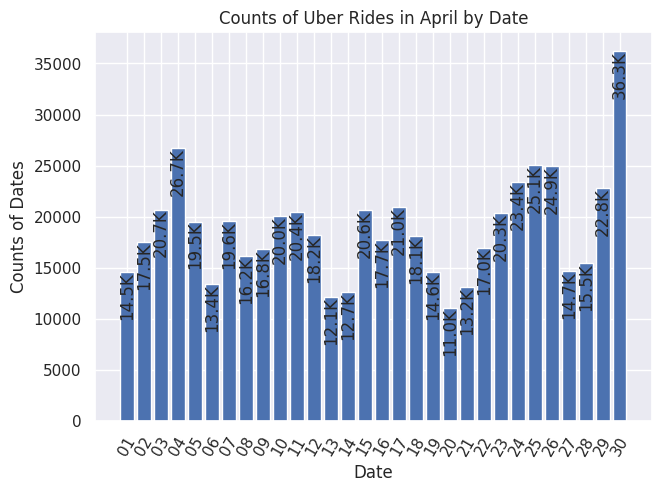

In [ ]:
# Create a bar plot of Dates:
plt.bar(date_counts.index,date_counts.values)
plt.xlabel('Date')
plt.xticks(date_counts.index, [i.strftime('%d') for i in date_counts.index], rotation= 60)

plt.ylabel('Counts of Dates')

# Add annotation on y-axis:
for i in range(len(date_counts)):
    plt.text(date_counts.index[i], date_counts.values[i], f"{date_counts.values[i]/1000:.1f}K", rotation= 90, ha='center', va='top')

plt.title('Counts of Uber Rides in April by Date')
plt.show()

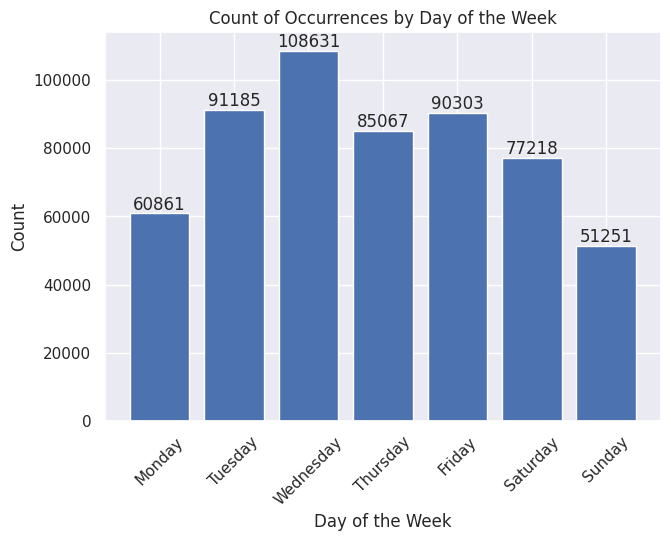

In [ ]:
# Sort the counts of Days from Monday to Friday:
days_label= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_in_order= ['aMonday', 'aTuesday', 'aWednesday', 'aThursday', 'aFriday', 'aSaturday', 'aSunday']
day_counts= day_counts.reindex(days_in_order)

# Make a bar plot:
plt.bar(day_counts.index, day_counts.values)

# Reset the x-axis label:
plt.xlabel('Day of the Week')
plt.xticks(ticks= day_counts.index,labels= days_label,rotation= 45)

plt.ylabel('Count')

# Add annotation on y-axis:
for i in range(len(day_counts)):
    plt.text(day_counts.index[i], day_counts.values[i], str(day_counts.values[i]), ha='center', va='bottom')

plt.title('Count of Occurrences by Day of the Week')
plt.show()

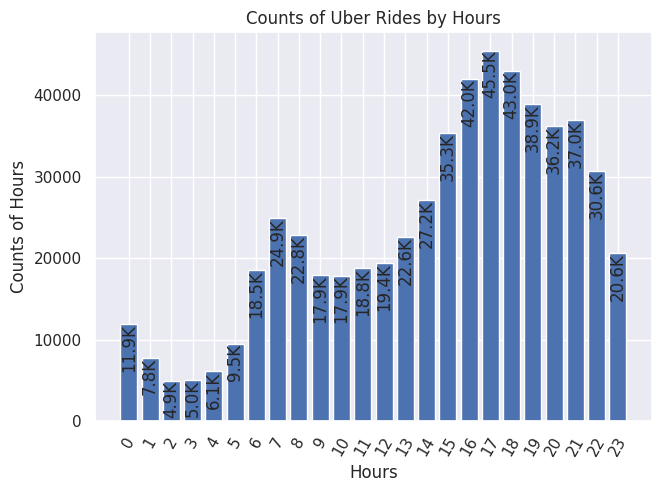

In [ ]:
# Create a bar plot for Hours:
plt.bar(hour_counts.index,hour_counts.values)
plt.xlabel('Hours')
plt.xticks(hour_counts.index,rotation= 60)

plt.ylabel('Counts of Hours')

# Add annotation on y-axis:
for i in range(len(hour_counts)):
    plt.text(hour_counts.index[i], hour_counts.values[i], f"{hour_counts.values[i]/1000:.1f}K", rotation= 90, ha='center', va='top')

plt.title('Counts of Uber Rides by Hours')
plt.show()

In [ ]:
data_concat['Date/Time'] = pd.to_datetime(data_concat['Date/Time'])

# Add two new columns of Date and Hours:
data_concat['Date'] = data_concat['Date/Time'].dt.date
data_concat['Hour'] = data_concat['Date/Time'].dt.hour
data_concat['Day_of_Week']= data_concat['Date/Time'].dt.strftime('a%A')
data_concat['Day_of_Week']= data_concat['Day_of_Week'].str[1:]

# Calculate counts of occurrences of Dates and Hours:
date_counts_concat = data_concat['Date'].value_counts().sort_index()
hour_counts_concat = data_concat['Hour'].value_counts().sort_index()

day_counts_concat = data_concat['Day_of_Week'].value_counts()

In [ ]:
base_map= {
    'B02512': 'Unter',
    'B02598': 'Hinter',
    'B02617': 'Weiter',
    'B02682': 'Schmecken',
    'B02764': 'Danach-NY'}

data_concat['Base']= data_concat['Base'].map(base_map)

In [ ]:
data_concat

,Date/Time,Lat,Lon,Base,Date,Hour,Day_of_Week
0,2014-04-01 00:11:00,40.7690,-73.9549,Unter,2014-04-01,0,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,Unter,2014-04-01,0,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,Unter,2014-04-01,0,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,Unter,2014-04-01,0,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,Unter,2014-04-01,0,Tuesday
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,Danach-NY,2014-09-30,22,Tuesday
1028132,2014-09-30 22:57:00,40.6911,-74.1773,Danach-NY,2014-09-30,22,Tuesday
1028133,2014-09-30 22:58:00,40.8519,-73.9319,Danach-NY,2014-09-30,22,Tuesday
1028134,2014-09-30 22:58:00,40.7081,-74.0066,Danach-NY,2014-09-30,22,Tuesday


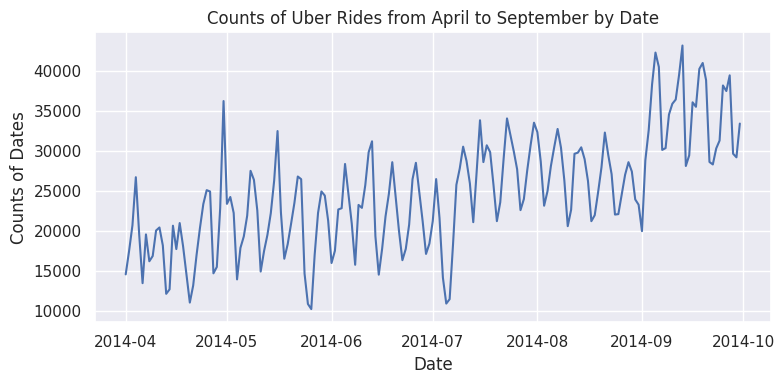

In [ ]:
# Create a line plot of Dates:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(date_counts_concat.index, date_counts_concat.values)
ax.set_xlabel('Date')
ax.set_ylabel('Counts of Dates')
ax.set_title('Counts of Uber Rides from April to September by Date')

plt.tight_layout()
plt.show()

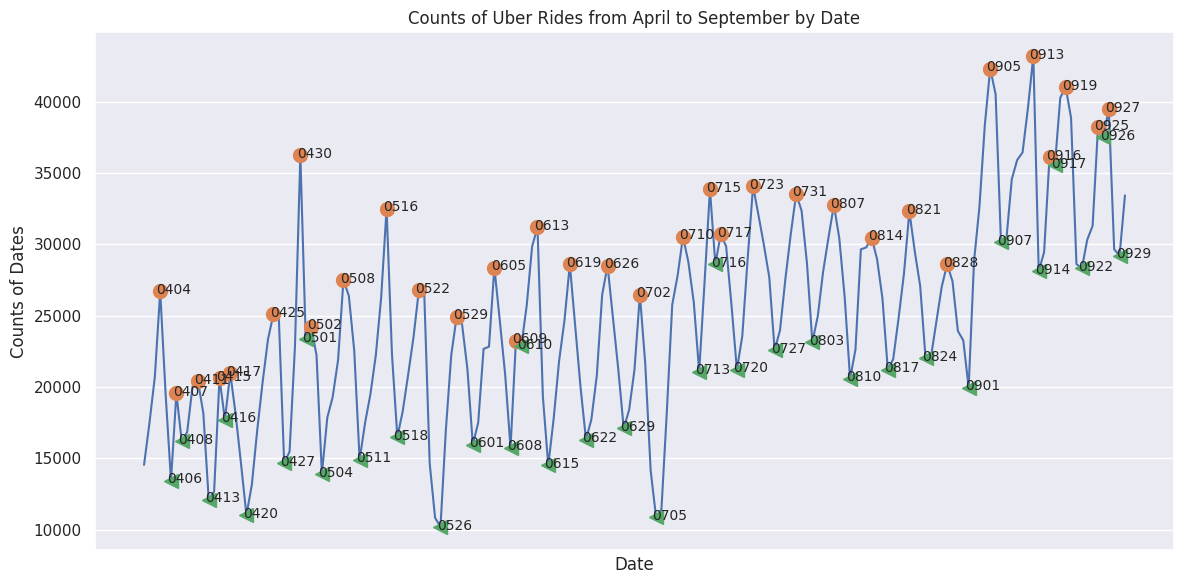

In [ ]:
# Create a line plot of Dates:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(date_counts_concat.index, date_counts_concat.values)
ax.set_xlabel('Date')
ax.set_ylabel('Counts of Dates')
ax.set_title('Counts of Uber Rides from April to September by Date')

# Get the indices of peaks and pits in the data:
from scipy.signal import find_peaks
peaks, _ = find_peaks(date_counts_concat.values)
pits, _ = find_peaks(-date_counts_concat.values)
peaks_and_pits = np.sort(np.concatenate([peaks, pits]))

# Add markers at the peaks and pits:
ax.plot(date_counts_concat.index[peaks], date_counts_concat.values[peaks], 'o', markersize=10, label='Peaks')
ax.plot(date_counts_concat.index[pits], date_counts_concat.values[pits], '<', markersize=10, label='Pits')

# Add annotations with the corresponding dates at the peaks and pits:
for i in range(len(peaks_and_pits)):
    ax.annotate(date_counts_concat.index[peaks_and_pits[i]].strftime('%m%d'),
                xy=(date_counts_concat.index[peaks_and_pits[i]], date_counts_concat.values[peaks_and_pits[i]]),
                xytext=(10,6),
                textcoords='offset points',
                fontsize= 10,
                ha='center',
                va='top')
                #bbox= dict(boxstyle='round',facecolor='white'))

ax.set_xticks([])
plt.tight_layout()

plt.show()

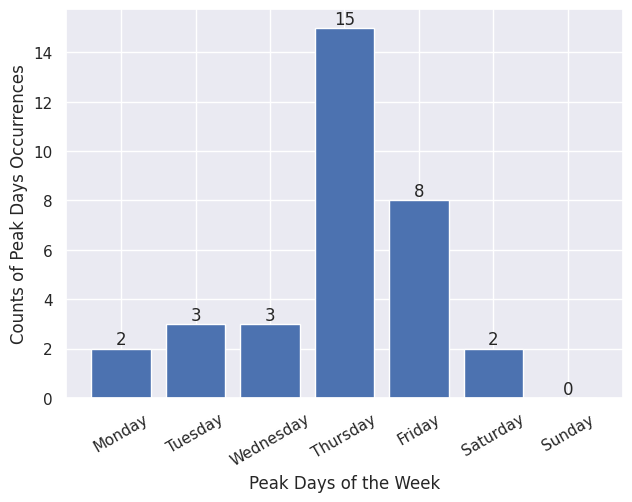

In [ ]:
peak_days_of_week= []

for i in peaks:
    peak_date= date_counts_concat.index[i]
    peak_day_of_week= peak_date.strftime('%A')
    peak_days_of_week.append(peak_day_of_week)

peak_days, counts= np.unique(peak_days_of_week, return_counts= True)

peak_df= pd.DataFrame(data=counts, index=peak_days, columns=['Counts'])
days_label= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

peak_df= peak_df.reindex(days_label)
peak_df.fillna(0, inplace=True)
peak_df['Counts']= peak_df['Counts'].astype(int)

plt.bar(peak_df.index, peak_df['Counts'])
plt.xlabel('Peak Days of the Week')
plt.xticks(rotation= 30, ha= 'center')
plt.ylabel('Counts of Peak Days Occurrences')

for i in range(len(peak_df.index)):
    plt.text(peak_df.index[i],peak_df.Counts[i],peak_df.Counts[i], ha= 'center', va= 'bottom')

plt.show()

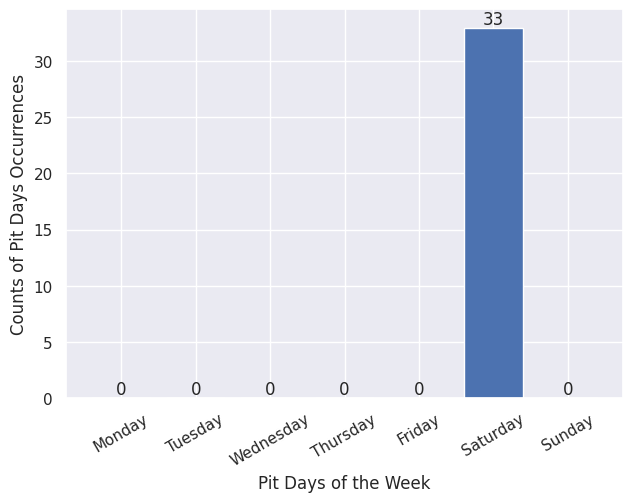

In [ ]:
pits_days_of_week= []

for i in pits:
    pits_date= date_counts_concat.index[i]
    pits_day_of_week= peak_date.strftime('%A')
    pits_days_of_week.append(pits_day_of_week)

pits_days, counts= np.unique(pits_days_of_week, return_counts= True)

pits_df= pd.DataFrame(data=counts, index=pits_days, columns=['Counts'])
days_label= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pits_df= pits_df.reindex(days_label)
pits_df.fillna(0, inplace=True)
pits_df['Counts']= pits_df['Counts'].astype(int)

plt.bar(pits_df.index, pits_df['Counts'])
plt.xlabel('Pit Days of the Week')
plt.xticks(rotation= 30, ha= 'center')
plt.ylabel('Counts of Pit Days Occurrences')

for i in range(len(pits_df.index)):
    plt.text(pits_df.index[i],pits_df.Counts[i],pits_df.Counts[i], ha= 'center', va= 'bottom')

plt.show()

In [ ]:
# Parse data:
thursday_data= data_apr[data_apr['Day_of_Week']=='aThursday']

import folium
from folium.plugins import HeatMap
heatmap_thursday= folium.Map(location= [40.7128,-74.0060], zoom_start= 12)

# Add heapmap layer to the NYC map:
HeatMap(thursday_data[['Lat','Lon']].values).add_to(heatmap_thursday)

heatmap_thursday

In [ ]:
# Parse data:
sunday_data= data_apr[data_apr['Day_of_Week']=='aSunday']

import folium
from folium.plugins import HeatMap
heatmap_sunday= folium.Map(location= [40.7128,-74.0060], zoom_start= 12)

# Add heapmap layer to the NYC map:
HeatMap(sunday_data[['Lat','Lon']].values).add_to(heatmap_sunday)

heatmap_sunday